- Luis Jiménez
- Lenin Quezada
- José Melchor
---

# Reporte de Laboratorio 5

## Funciones 

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from semopy import Model, Optimizer
import matplotlib.pyplot as plt
from semopy import Model, Optimizer, semplot

## Descargar históricos de acciones 

In [2]:
def get_adj_close(tickets, start=None, end=None):
    return yf.download(tickets, start=start, end=end)['Adj Close']

In [3]:
tickers = ['BIMBOA.MX', 'KHC', 'NESN.SW', 'PEP', 'KOF', 'MKC', 'HERDEZ.MX', 'BN.PA', 'ULVR.L', 'HLF', 'CAG', 'MDLZ']
closes = get_adj_close(tickers, start='2018-01-01', end='2024-01-01')
rend = closes.pct_change()
rend = rend.dropna()
rend.head()

[*********************100%%**********************]  12 of 12 completed


Ticker,BIMBOA.MX,BN.PA,CAG,HERDEZ.MX,HLF,KHC,KOF,MDLZ,MKC,NESN.SW,PEP,ULVR.L
Date,,,,,,,,,,,,
2018-01-04,0.006221,0.014835,0.016341,-0.006970,0.009734,0.011687,0.003143,0.002348,0.006307,-0.000959,0.004926,0.003080
2018-01-05,-0.002977,0.018308,0.003163,0.023909,0.011079,-0.000899,0.008829,0.012887,0.009793,0.005282,0.002873,0.005281
2018-01-08,-0.000689,-0.006690,-0.014188,0.000000,-0.007400,0.008222,0.010023,-0.005090,0.001067,-0.001194,-0.005730,-0.000244
2018-01-09,0.002758,-0.001403,-0.003465,-0.009426,0.007455,0.001784,-0.009224,-0.000464,-0.000969,0.009087,0.000763,-0.001833
2018-01-10,-0.012835,-0.029928,-0.014977,-0.024222,-0.019496,-0.009285,-0.016787,-0.008374,-0.014934,-0.014218,-0.005081,-0.019221


## Calcular la variable latente. Mood del mercado en la industria alimentaria

In [4]:
model_desc = f"""
# Latent Variables
Mood =~ {tickers[0]} + {tickers[1]} + {tickers[2]} + {tickers[3]} + {tickers[4]} + {tickers[5]} + {tickers[6]} + {tickers[7]} + {tickers[8]} + {tickers[9]} + {tickers[10]} + {tickers[11]}
"""

In [5]:
mod = Model(model_desc)
res_opt = mod.fit(rend)
estimates = mod.inspect()

# Imprimir los resultados del ajuste del modelo
print(estimates)

         lval  op       rval   Estimate    Std. Err    z-value   p-value
0   BIMBOA.MX   ~       Mood   1.000000           -          -         -
1         KHC   ~       Mood   0.105937   90.912089   0.001165   0.99907
2     NESN.SW   ~       Mood   0.087248   269.94345   0.000323  0.999742
3         PEP   ~       Mood   0.120218  152.797184   0.000787  0.999372
4         KOF   ~       Mood   0.086419   21.788306   0.003966  0.996835
5         MKC   ~       Mood   0.108006  133.256444   0.000811  0.999353
6   HERDEZ.MX   ~       Mood   0.200284   33.526264   0.005974  0.995234
7       BN.PA   ~       Mood   0.091393  201.185505   0.000454  0.999638
8      ULVR.L   ~       Mood   0.095697  208.074698    0.00046  0.999633
9         HLF   ~       Mood   0.148888   18.981368   0.007844  0.993742
10        CAG   ~       Mood   0.080596  125.199208   0.000644  0.999486
11       MDLZ   ~       Mood   0.141649  123.386738   0.001148  0.999084
12       Mood  ~~       Mood   0.000089    0.025537

In [6]:
# Paso 5: Visualizar el Modelo SEM con un Diagrama de Trayectoria
print(res_opt)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 89.739
Number of iterations: 36
Params: 0.106 0.087 0.120 0.086 0.108 0.200 0.091 0.096 0.149 0.081 0.142 1.808 7.174 2.772 0.115 0.016 1.445 0.001 2.663 3.131 0.000 12.932 4.118 7.674


In [10]:
mood_factors = res_opt.x[0:(len(tickers)-1)].tolist()
mood_factors.insert(0, 1)
mood_factors

[1,
 0.10593720112465946,
 0.08724814062393049,
 0.12021831893170191,
 0.08641895482796168,
 0.10800623523860317,
 0.20028359472189652,
 0.09139324514671182,
 0.0956966496270609,
 0.1488883386055401,
 0.08059565844596778,
 0.14164908912032706]

In [11]:
def calculate_latent_values(df, factors, var):
    resultado = pd.DataFrame()
    for i in range(len(factors)):
        resultado[var[i]] =  df.iloc[:, i] * factors[i]
    resultado['Latent Value'] = resultado.sum(axis=1)
    resultado = resultado['Latent Value']
    return resultado

In [12]:
mood = calculate_latent_values(rend[tickers], mood_factors, tickers)
mood

Date
2018-01-04    0.012274
2018-01-05    0.010252
2018-01-08   -0.003231
2018-01-09    0.001503
2018-01-10   -0.033456
                ...   
2023-12-22    0.010574
2023-12-26   -0.000033
2023-12-27   -0.003725
2023-12-28   -0.003690
2023-12-29   -0.012856
Name: Latent Value, Length: 1550, dtype: float64

<Axes: xlabel='Date'>

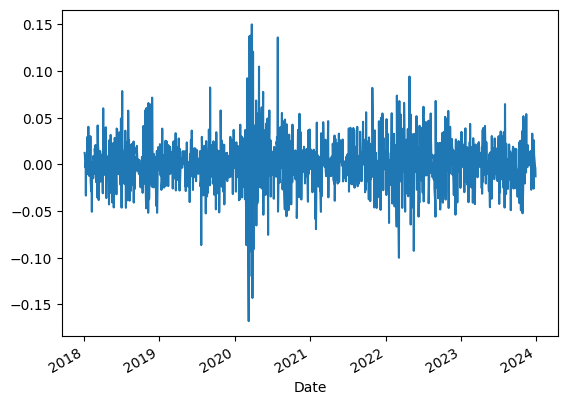

In [14]:
mood.plot()

In [13]:
g = semplot(mod, 'pd.png')

## Gráfica

<img src="pd.png">

## Coeficientes de la variable latente 

In [23]:
coeficientes = pd.DataFrame({'Acción':tickers})
coeficientes['Factores'] = mood_factors
coeficientes

,Acción,Factores
0,BIMBOA.MX,1.000000
1,KHC,0.105937
2,NESN.SW,0.087248
3,PEP,0.120218
4,KOF,0.086419
5,MKC,0.108006
6,HERDEZ.MX,0.200284
7,BN.PA,0.091393
8,ULVR.L,0.095697
9,HLF,0.148888


## Interpretación de los coeficientes

Los rendimienteos de todas las acciones afectan positivamente al mood del mercado de la industria alimentaria. La variable que mas afecta es Bimbo, despues Herdez, Herbalife, Mondelēz International. Se puede ver que ninguna afecta en la misma proporción al mood como lo hace bimbo, ya que, bimbo tiene un coeficiente de 1 y las demás son menores al 0.25, y se entiende que no son tan importantes estos factores para calcularlo. Esto mismo se observa en los p-value, lo quen nos dice que no son importantes para el modelo.